instant       0
year          0
season        0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
Cluster       0
dtype: int64


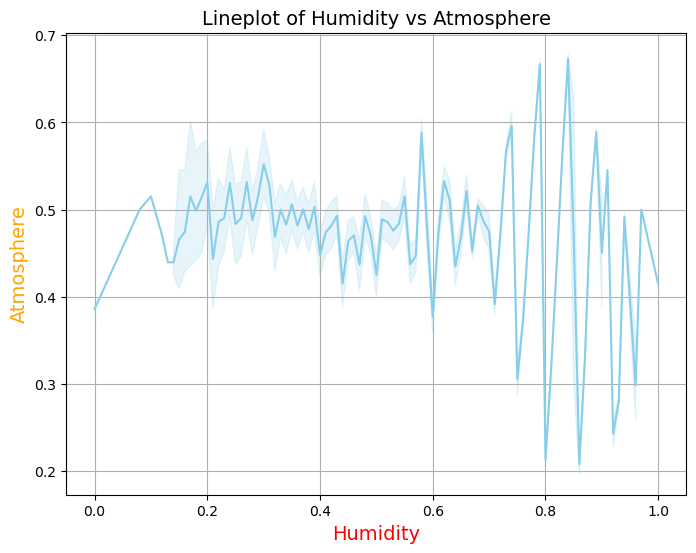

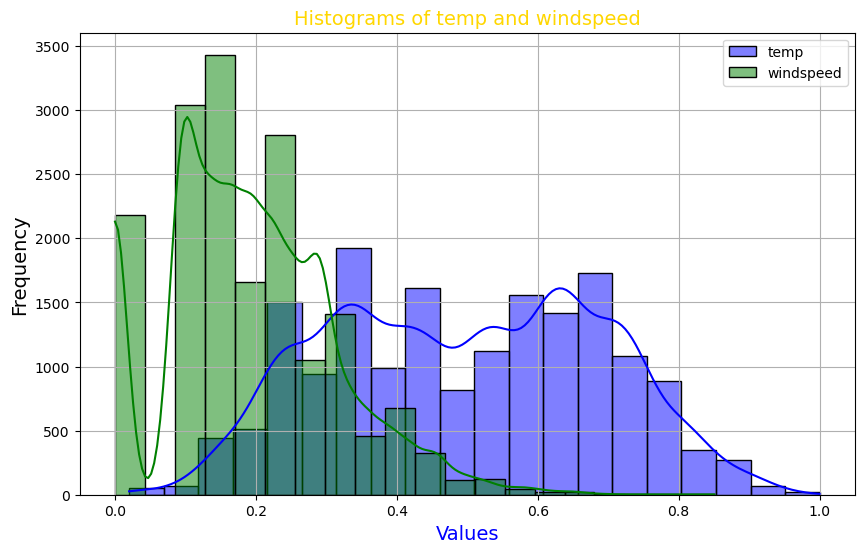

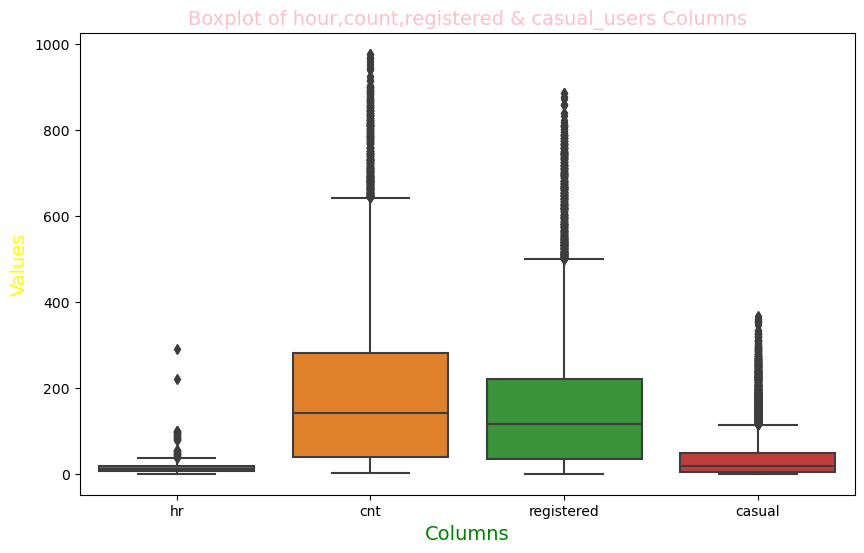

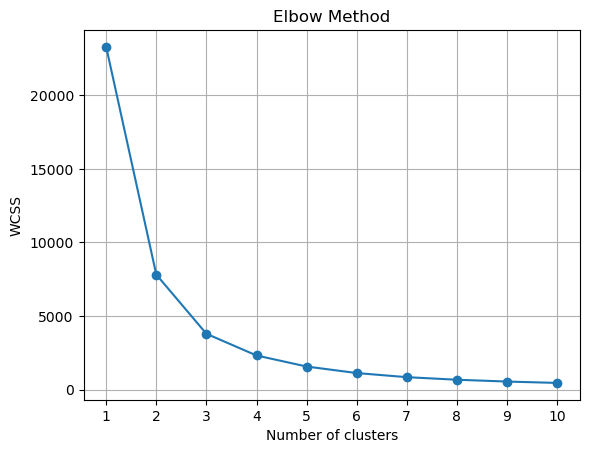

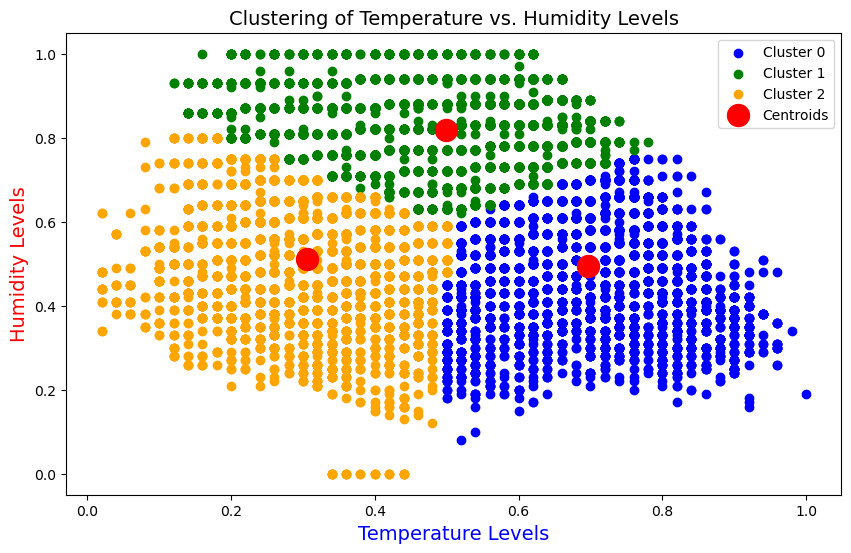

R-squared: 0.004883408815249735, Mean Squared Error: 0.03703801969844947
                            OLS Regression Results                            
Dep. Variable:                    hum   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     85.28
Date:                Fri, 14 Jun 2024   Prob (F-statistic):           2.89e-20
Time:                        11:55:47   Log-Likelihood:                 3979.2
No. Observations:               17379   AIC:                            -7954.
Df Residuals:                   17377   BIC:                            -7939.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

(                    Mean      Median  Standard Deviation  Skewness  \
 instant      8690.000000   8690.0000         5017.029500  0.000000   
 year        10689.000000  10689.0000         5017.029500  0.000000   
 season          2.501640      3.0000            1.106918 -0.005416   
 mnth            6.537775      7.0000            3.438776 -0.009253   
 hr             11.755682     12.0000            8.093618  4.703430   
 holiday         0.028770      0.0000            0.167165  5.638538   
 weekday         3.003683      3.0000            2.005771 -0.002998   
 workingday      0.682721      1.0000            0.465431 -0.785258   
 weathersit      1.425283      1.0000            0.639357  1.228047   
 temp            0.496987      0.5000            0.192556 -0.006021   
 atemp           0.475775      0.4848            0.171850 -0.090429   
 hum             0.627229      0.6300            0.192930 -0.111287   
 windspeed       0.190098      0.1940            0.122340  0.574905   
 casua

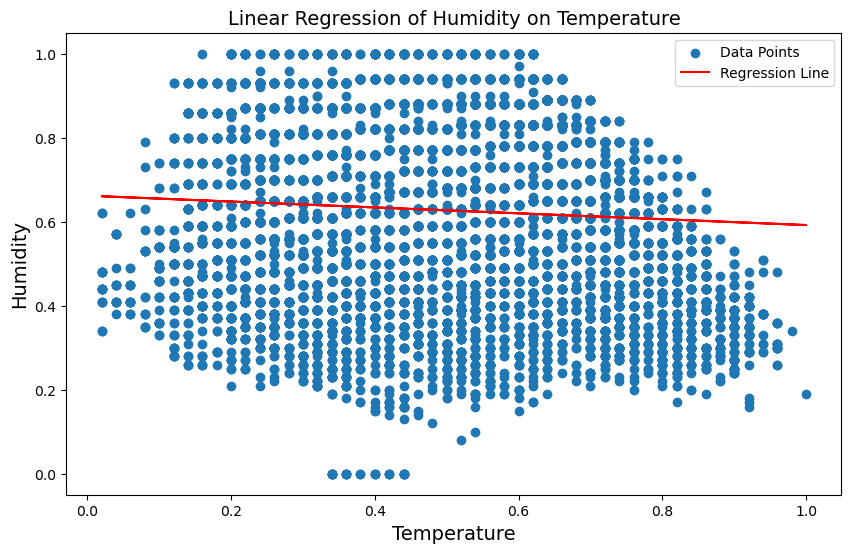

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import normalize
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, accuracy_score
import warnings
warnings.filterwarnings("ignore")


#Relational Graph(Line plot)
def plot_lineplot(data, x_column, y_column):
    """
    Plot a line plot.

    Parameters:
    data (DataFrame): The DataFrame containing the data.
    x_column (str): The column name for the x-axis.
    y_column (str): The column name for the y-axis.
    """
    plt.figure(figsize=(8, 6))
    sns.lineplot(data=data, x=x_column, y=y_column, color='skyblue', linestyle='solid')
    plt.grid(True)
    plt.title('Lineplot of Humidity vs Atmosphere',fontsize=14)
    plt.xlabel("Humidity",fontsize=14,color='red')
    plt.ylabel("Atmosphere",fontsize=14,color='orange')
    plt.show()


#Statistical Graph(Box plot)
def plot_boxplot(data, *columns):
    """
    Plot box plots for specified columns in one graph.

    Parameters:
    data (DataFrame): The DataFrame containing the data.
    *columns (str): more then one number of column names to create box plots for.
    """
    # Melt the DataFrame to long format
    plt.figure(figsize=(10, 6))
    df_melted = data.melt(value_vars=columns, var_name='Column', value_name='Value')
    sns.boxplot(x='Column', y='Value', data=df_melted)
    plt.title('Boxplot of hour,count,registered & casual_users Columns',fontsize=14,color='Pink')
    plt.xlabel('Columns',fontsize=14,color='Green')
    plt.ylabel('Values',fontsize=14,color='Yellow')
    plt.show()

#Categorical Graph(histogram)
def plot_histograms_in_one(data, col1, col2, bins=20, kde=True):
    """
    Plot histograms for two specified columns in one plot.

    Parameters:
    data (DataFrame): The DataFrame containing the data.
    col1 (str): The first column name to create histogram for.
    col2 (str): The second column name to create histogram for.
    bins (int): Number of bins for the histogram.
    kde (bool): Whether to plot a Gaussian kernel density estimate.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=col1, bins=bins, kde=kde, color='blue', label=col1, alpha=0.5)
    sns.histplot(data=data, x=col2, bins=bins, kde=kde, color='green', label=col2, alpha=0.5)
    plt.title(f'Histograms of {col1} and {col2}',fontsize=14,color='Gold')
    plt.grid()
    plt.xlabel('Values',fontsize=14,color='blue')
    plt.ylabel('Frequency',fontsize=14)
    plt.legend()


#Normalized The data
def normalize_process_data(X):
    """
    Normalize the input data.

    Parameters:
    X (DataFrame or ndarray): The data to be normalized.

    Returns:
    ndarray: Normalized data.
    """
    return pd.DataFrame(normalize(X), columns=X.columns)


#Calculate Within-Cluster Sum of Square(WCSS)
def cal_wcss(X):
    """
    Calculate the within-cluster sum of squares (WCSS) for different numbers of clusters.

    Parameters:
    X (DataFrame or ndarray): The data to be clustered.

    Returns:
    list: A list of WCSS values for clusters ranging from 1 to 10.
    """
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    wcss = []
    for a in range(1, 11):
        kmeans = KMeans(n_clusters=a, init='k-means++', random_state=42)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)
    return wcss


#view Elbow method graph 
def elbow_method(wcss):
    """
    Plot the elbow method graph to determine the optimal number of clusters.

    Parameters:
    wcss (list): A list of WCSS values.
    """
    plt.plot(range(1, len(wcss) + 1), wcss, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.xticks(range(1, len(wcss) + 1))
    plt.grid(True)
    plt.show()


#Perform K-means clustering on the fit_predict data
def fitting_kmeans_clustering(data,n_clusters,temp_col,hum_col):
    
    """
    Perform K-Means clustering on the temperature and humidity data.

    Parameters:
        data (pd.DataFrame): DataFrame containing the temperature and humidity data.
        n_clusters (int): Number of clusters for K-Means clustering.
        temp_col (str): Column name for temperature.
        hum_col (str): Column name for humidity.

    Returns:
        centroids (np.ndarray): Coordinates of cluster centroids.
        clusters (pd.Series): Cluster labels for each data point in the input DataFrame.
    """
    
    kmeans = KMeans(n_clusters, random_state=0)
    data['Cluster'] = kmeans.fit_predict(data[[temp_col, hum_col]])
    centroids = kmeans.cluster_centers_
    return centroids, data['Cluster']


#perperform_linear_regression
def perform_linear_regression(data, x_col, y_col):
    """
    Performs linear regression on the dataset using statsmodels.

    Parameters:
    data (DataFrame): The dataset to use for regression.
    x_col (str): The name of the column to use as the predictor.
    y_col (str): The name of the column to use as the response.

    Returns:
    model: The fitted linear regression model.
    np.array: The predicted values.
    """
    X = data[x_col]
    y = data[y_col]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)
    r2 = model.rsquared
    mse = mean_squared_error(y, predictions)
    print(f'R-squared: {r2}, Mean Squared Error: {mse}')
    print(model.summary())
    return predictions
    

# Scatter plot for actual data with cluster labels
def cluster_and_plot(data, temp_col, hum_col,clustered_data,centroids):
    
    """
    Perform clustering on the temperature and humidity data, visualize the clusters along with cluster centroids.

    Parameters:
        data (pd.DataFrame): DataFrame containing the temperature and humidity data.
        temp_col (str): Column name for temperature.
        hum_col (str): Column name for humidity.
        n_clusters (int): Number of clusters for K-Means clustering. Default is 3.
        centroids (np.ndarray): Coordinates of cluster centroids.
    """
    
    plt.figure(figsize=(10, 6))
    colors = ['blue', 'green', 'orange']
    for cluster in range(3):
        clustered_data = data[data['Cluster'] == cluster]
        plt.scatter(clustered_data[temp_col], clustered_data[hum_col], color=colors[cluster], label=f'Cluster {cluster}')
    
    plt.scatter(centroids[:, 0], centroids[:, 1], s=250, color='red', label='Centroids') # Plot centroids
    plt.xlabel('Temperature Levels',fontsize=14,color='blue')
    plt.ylabel('Humidity Levels',fontsize=14,color='Red')
    plt.title('Clustering of Temperature vs. Humidity Levels',fontsize=14)
    plt.legend()
    plt.show()

#predict data graph
def view_liner_reg(data,predictions):
    """
    Plots the linear regression results along with the original data points.

    Parameters:
    data (DataFrame): The dataset containing the original data.
    predictions (array-like): The predicted values from the linear regression.
    
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(bike_data['temp'], bike_data['hum'], label='Data Points')
    plt.plot(bike_data['temp'], predictions, color='red', label='Regression Line')
    plt.xlabel('Temperature',fontsize=14)
    plt.ylabel('Humidity',fontsize=14)
    plt.title('Linear Regression of Humidity on Temperature',fontsize=14)
    plt.legend()

    
# Calulate Count', 'Mean', 'Std Dev', 'Min', '25%', '50%', '75%', 'Max', 'Skewness', 'Kurtosis', 'Median', 'corr_matrix'
def calculate_Statics(data):
    """
    Calculate various statistics for numerical columns in a data.

    Parameters:
    - data: DataFrame containing all kinds of data (numeric, string).

    Returns:
    - statistics_df: DataFrame containing statistics such as Mean, Median, Standard Deviation, Skewness, Kurtosis
      count, mean, std, min, 25%, 50%, 75%, max for each numerical column.
    - corr_matrix: DataFrame containing the correlation matrix for the numerical columns.
    """
    numeric_columns = data.select_dtypes(include='number')
    mean_values = numeric_columns.mean()
    median_values = numeric_columns.median()
    std_dev_values = numeric_columns.std()
    skewness_values = numeric_columns.skew()
    kurtosis_values = numeric_columns.kurtosis()
    
    statistics_df = pd.DataFrame({
        'Mean': mean_values,
        'Median': median_values,
        'Standard Deviation': std_dev_values,
        'Skewness': skewness_values,
        'Kurtosis': kurtosis_values
    })
    
    summary_statistics = numeric_columns.describe().transpose()
    statistics_df = pd.concat([statistics_df, summary_statistics], axis=1)
    corr_matrix = numeric_columns.corr()
    return statistics_df, corr_matrix
    
#===========================program execution start from here=========================

#read the bike data_set
bike_data=pd.read_csv("bike.csv")

#check null values are there or not
print(bike_data.isnull().sum())

# line plot for humidity and Atmosphere
plot_lineplot(bike_data, 'hum', 'atemp')

#display 6 records of data_set
bike_data.head(6)

#histogram for 2 temperature and wind speed
plot_histograms_in_one(bike_data, 'temp', 'windspeed')

#boxplot  for 'hour','cnt'  'registered', 'casual' colums
plot_boxplot(bike_data, 'hr', 'cnt', 'registered', 'casual')

#Training and Normalize the training features
X = bike_data[['temp', 'hum']]
X_train, X_test, y_train, y_test = train_test_split(X, bike_data['year'], test_size=0.33, random_state=0)
X_train_norm = normalize_process_data(X_train)

# Calculate WCSS using K-means clustering
wcss_vals = cal_wcss(X_train_norm)

# Perform elbow method using normalized features
elbow_method(wcss_vals)

#To find centroids
optimal_clusters = 3
centroids ,clustered_data = fitting_kmeans_clustering(bike_data,optimal_clusters,'temp', 'hum')

# Perform K-means Clustering
cluster_and_plot(bike_data, 'temp', 'hum',clustered_data,centroids)

#perform linerregression
predictions_data = perform_linear_regression(bike_data.copy(), 'temp', 'hum')
view_liner_reg(bike_data,predictions_data)

#calculate statics of crop data
calculate_Statics(bike_data)